In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/Wendy611/QM/main/full_data.csv")
df.head()

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout_at_mayoral_election_2012,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,25.7,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,20.3,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,22.5,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271
3,4,E05000029,Barking and Dagenham,6.5,240500.0,33920.0,79.2,82.2,56.0,1.2,25.3,76.1,37.9,14.2,36.0,64.0,0.976306,0.992778
4,5,E05000030,Barking and Dagenham,4.5,240000.0,37400.0,77.1,81.1,50.4,1.6,24.1,66.7,24.8,14.2,100.0,0.0,0.963242,0.966455


In [38]:
print("df.shape: ", df.shape)

df.shape:  (624, 18)


In [35]:
size = len(df)

older_mean = df['%_all_older_people_aged_65_2015'].mean()
older_median = df['%_all_older_people_aged_65_2015'].median()
older_min = df['%_all_older_people_aged_65_2015'].min()
older_max = df['%_all_older_people_aged_65_2015'].max()
older_people_percent_range = older_max - older_min
variance = df['%_all_older_people_aged_65_2015'].var()
std_dev = df['%_all_older_people_aged_65_2015'].std()

print("size of dataset:",size)
print("mean:", round(older_mean, 2))
print("median:", older_median)
print("min:", older_min)
print("max:", older_max)
print("range:", older_people_percent_range)
print("variance:", round(variance, 3))
print("standard deviation:", round(std_dev, 3))

size of dataset: 624
mean: 11.79
median: 11.1
min: 3.7
max: 24.3
range: 20.6
variance: 18.192
standard deviation: 4.265


<AxesSubplot:>

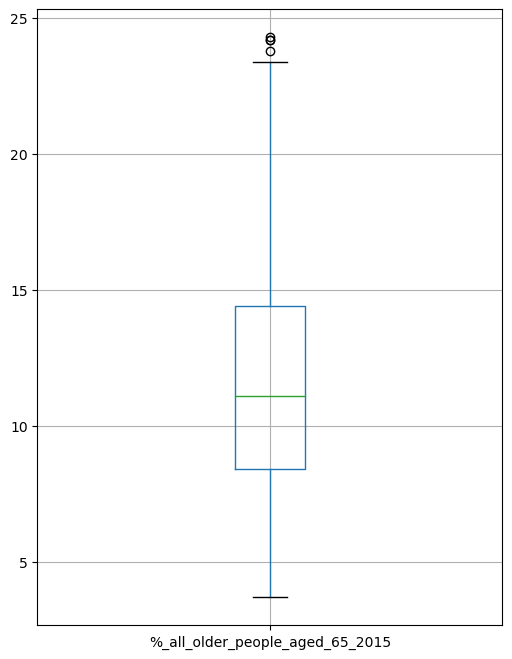

In [79]:
df.boxplot(column='%_all_older_people_aged_65_2015', figsize=(6, 8))

Text(12.97136217948718, 63.315, 'Mean:11.79')

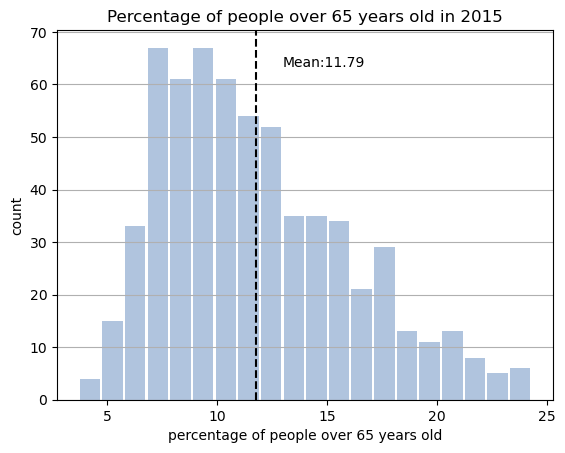

In [52]:
df['%_all_older_people_aged_65_2015'].plot.hist(grid=True, bins=20, rwidth=0.9,
                                               color='#B0C4DE')
plt.title('Percentage of people over 65 years old in 2015')
plt.xlabel('percentage of people over 65 years old')
plt.ylabel('count')

plt.grid(axis='x')
plt.axvline(older_mean, color='k', linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(older_mean*1.1, max_ylim*0.9, 'Mean:{:.2f}'.format(older_mean))

In [53]:
df.columns

Index(['Unnamed: 0', 'ward', 'borough',
       '%_english_is_first_language_of_no_one_in_household_2011',
       'median_house_price_2014', 'median_household_income_estimate_2012_13',
       'male_life_expectancy_2009_13', 'female_life_expectancy_2009_13',
       '%_area_that_is_open_space_2014', '%_travel_by_bicycle_to_work_2011',
       'turnout_at_mayoral_election_2012', 'crime_rate_2014_15', '%_bame_2011',
       '%_all_older_people_aged_65_2015', '%_homes_with_good_access_to_nature',
       '%_homes_with_deficiency_in_access_to_nature',
       'female_life_expectancy_normalised', 'male_life_expectancy_normalised'],
      dtype='object')

In [55]:
df = df.rename(columns={'median_household_income_estimate_2012_13': 'income',
                       'turnout_at_mayoral_election_2012': 'turnout'})

In [64]:
df.corr()

,Unnamed: 0,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,income,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised
Unnamed: 0,1.000000,0.093328,0.194366,0.167865,-0.030050,-0.036006,-0.086308,0.257197,0.083252,0.121451,0.060438,-0.255443,-0.024884,0.024884,-0.036006,-0.030050
%_english_is_first_language_of_no_one_in_household_2011,0.093328,1.000000,0.138404,-0.250155,-0.103185,-0.069790,-0.314778,0.025750,-0.251114,0.251044,0.749317,-0.543030,-0.208124,0.208124,-0.069790,-0.103185
median_house_price_2014,0.194366,0.138404,1.000000,0.774241,0.460097,0.406423,-0.067367,0.308735,0.262742,0.302794,-0.278767,0.085899,0.077526,-0.077526,0.406423,0.460097
income,0.167865,-0.250155,0.774241,1.000000,0.648198,0.506527,0.018869,0.220767,0.510309,0.075341,-0.588628,0.338609,0.168295,-0.168295,0.506527,0.648198
male_life_expectancy_2009_13,-0.030050,-0.103185,0.460097,0.648198,1.000000,0.705725,0.076994,-0.184221,0.399158,-0.074633,-0.333248,0.525190,0.141751,-0.141751,0.705725,1.000000
female_life_expectancy_2009_13,-0.036006,-0.069790,0.406423,0.506527,0.705725,1.000000,0.036027,-0.050849,0.348662,-0.053537,-0.268129,0.393078,0.105695,-0.105695,1.000000,0.705725
%_area_that_is_open_space_2014,-0.086308,-0.314778,-0.067367,0.018869,0.076994,0.036027,1.000000,-0.221545,-0.009107,-0.165776,-0.243978,0.346641,0.239199,-0.239199,0.036027,0.076994
%_travel_by_bicycle_to_work_2011,0.257197,0.025750,0.308735,0.220767,-0.184221,-0.050849,-0.221545,1.000000,0.279535,0.165574,-0.094914,-0.443925,0.000637,-0.000637,-0.050849,-0.184221
turnout,0.083252,-0.251114,0.262742,0.510309,0.399158,0.348662,-0.009107,0.279535,1.000000,-0.166127,-0.320853,0.327602,0.124595,-0.124595,0.348662,0.399158
crime_rate_2014_15,0.121451,0.251044,0.302794,0.075341,-0.074633,-0.053537,-0.165776,0.165574,-0.166127,1.000000,0.079508,-0.245868,-0.150034,0.150034,-0.053537,-0.074633


In [68]:
reg_income = smf.ols(formula = 'turnout ~ income', data = df).fit()
print(reg_income.summary())

                            OLS Regression Results                            
Dep. Variable:                turnout   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.12e-42
Time:                        14:21:05   Log-Likelihood:                -1835.7
No. Observations:                 624   AIC:                             3675.
Df Residuals:                     622   BIC:                             3684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6911      0.993     19.827      0.0

In [69]:
beta_0, beta_1 = reg_income.params
rsq    = reg_income.rsquared
pval_0, pval_1 = reg_income.pvalues

In [70]:
print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of turnout = ", round(pval_1,5))
print("p-value of income = ", round(pval_0,5))

y = 0.0 x + 19.691
R^2 =  0.2604148271221467
p-value of turnout =  0.0
p-value of income =  0.0


y = 0.0 x + 19.691
Rsq =  0.2604148271221467
p-value of income =  1.1230825645670539e-42


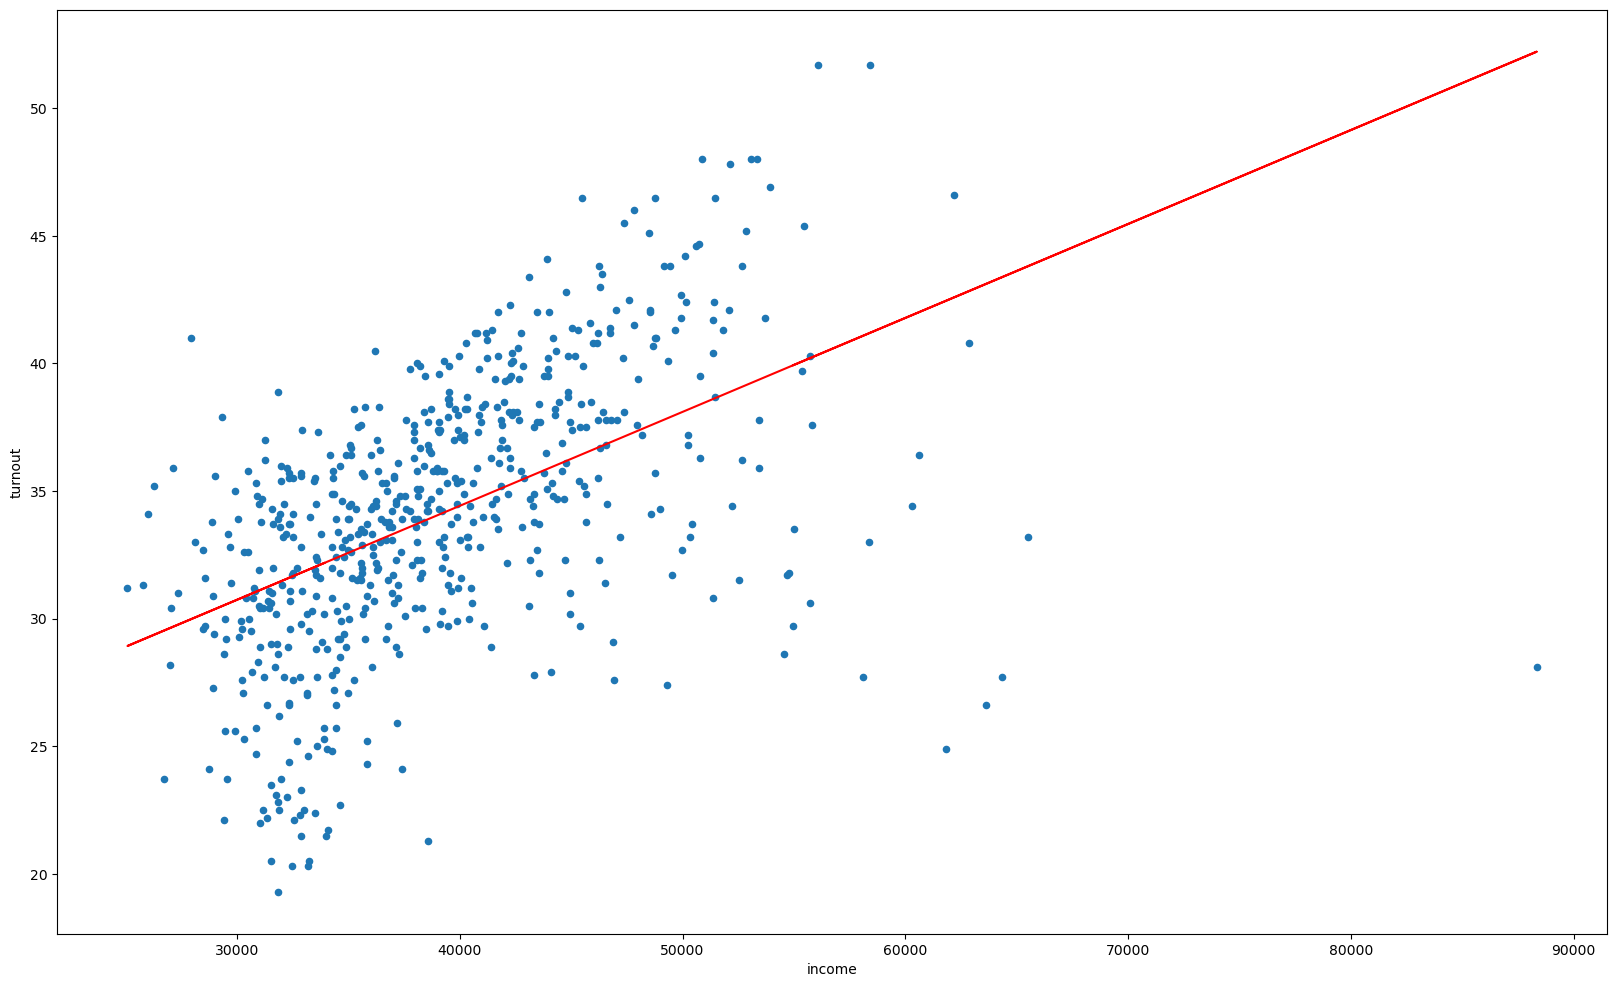

In [72]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='income', y='turnout', figsize=(20, 12), ax = ax)

X=df.income
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of income = ", pval_1)